## Question 1.	Import libraries and dataset 

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cifar10 = keras.datasets.cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
len(train_labels)

50000

In [7]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
test_images.shape

(10000, 32, 32, 3)

In [9]:
len(test_labels)

10000

## Question  2.	Visualize the dataset (label if possible)

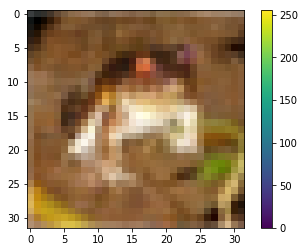

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

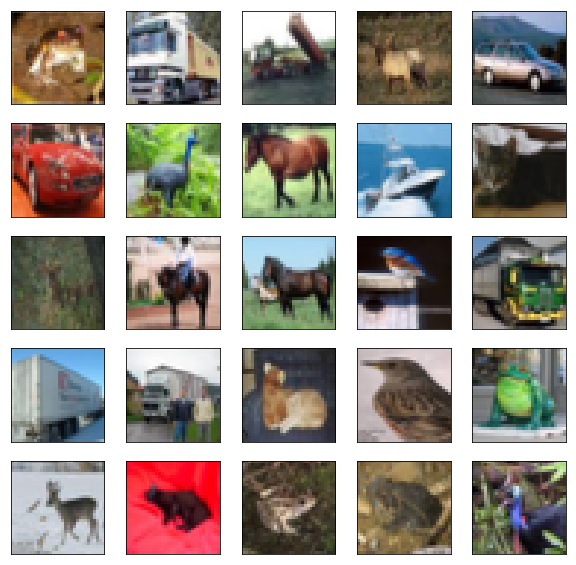

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

## Question 3.	Build the deep learning classifier.

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 28s 552us/step - loss: 1.9237 - acc: 0.3058
Epoch 2/5
50000/50000 [==============================] - 16s 311us/step - loss: 1.8042 - acc: 0.3573
Epoch 3/5
50000/50000 [==============================] - 14s 283us/step - loss: 1.7621 - acc: 0.3750
Epoch 4/5
50000/50000 [==============================] - 14s 285us/step - loss: 1.7404 - acc: 0.3811
Epoch 5/5
50000/50000 [==============================] - 14s 281us/step - loss: 1.7260 - acc: 0.3866


## Question 5.	Evaluate the accuracy of the model 

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 8s 765us/step
Test accuracy: 0.3786


## Question 4.	Change the parameters and try out with multiple techniques. 

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(120, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 14s 277us/step - loss: 1.9070 - acc: 0.3138
Epoch 2/5
50000/50000 [==============================] - 13s 257us/step - loss: 1.7401 - acc: 0.3763
Epoch 3/5
50000/50000 [==============================] - 13s 253us/step - loss: 1.6887 - acc: 0.3937
Epoch 4/5
50000/50000 [==============================] - 14s 272us/step - loss: 1.6642 - acc: 0.4032
Epoch 5/5
50000/50000 [==============================] - 13s 252us/step - loss: 1.6399 - acc: 0.4120


In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 135us/step
Test accuracy: 0.4189


Accuracy increases

## Question 6.	Demonstrate overfitting or under fitting

In [21]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

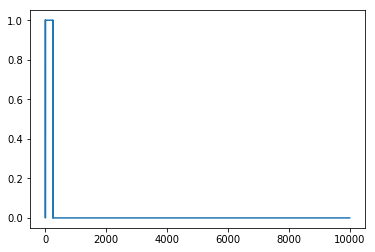

In [22]:
plt.plot(train_data[0])

In [23]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 52s - loss: -5.5796e+01 - acc: 0.1000 - binary_crossentropy: -5.5796e+01 - val_loss: -5.5795e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5795e+01
Epoch 2/20
 - 40s - loss: -5.5796e+01 - acc: 0.1000 - binary_crossentropy: -5.5796e+01 - val_loss: -5.5795e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5795e+01
Epoch 3/20
 - 39s - loss: -5.5796e+01 - acc: 0.1000 - binary_crossentropy: -5.5796e+01 - val_loss: -5.5796e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5796e+01
Epoch 4/20
 - 40s - loss: -5.5796e+01 - acc: 0.1000 - binary_crossentropy: -5.5796e+01 - val_loss: -5.5796e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5796e+01
Epoch 5/20
 - 31s - loss: -5.5797e+01 - acc: 0.1000 - binary_crossentropy: -5.5797e+01 - val_loss: -5.5796e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5796e+01
Epoch 6/20
 - 48s - loss: -5.5797e+01 - acc: 0.1000 - binary_crossentropy: -5.5797e+01 - val_loss: -5.5796e+01

In [34]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [35]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 61s - loss: 0.2601 - acc: 0.1003 - binary_crossentropy: 0.2601 - val_loss: -2.3857e-01 - val_acc: 0.1000 - val_binary_crossentropy: -2.3857e-01
Epoch 2/10
 - 29s - loss: -8.1928e-01 - acc: 0.1000 - binary_crossentropy: -8.1928e-01 - val_loss: -1.4683e+00 - val_acc: 0.1000 - val_binary_crossentropy: -1.4683e+00
Epoch 3/10
 - 33s - loss: -2.1977e+00 - acc: 0.1000 - binary_crossentropy: -2.1977e+00 - val_loss: -2.9983e+00 - val_acc: 0.1000 - val_binary_crossentropy: -2.9983e+00
Epoch 4/10
 - 45s - loss: -3.8681e+00 - acc: 0.1000 - binary_crossentropy: -3.8681e+00 - val_loss: -4.8094e+00 - val_acc: 0.1000 - val_binary_crossentropy: -4.8094e+00
Epoch 5/10
 - 27s - loss: -5.8123e+00 - acc: 0.1000 - binary_crossentropy: -5.8123e+00 - val_loss: -6.8873e+00 - val_acc: 0.1000 - val_binary_crossentropy: -6.8873e+00
Epoch 6/10
 - 32s - loss: -8.0200e+00 - acc: 0.1000 - binary_crossentropy: -8.0200e+00 - val_loss: -9.2279e+00 - val_acc

In [36]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [37]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=10,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 113s - loss: -5.3683e+01 - acc: 0.1001 - binary_crossentropy: -5.3683e+01 - val_loss: -5.5798e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5798e+01
Epoch 2/10
 - 69s - loss: -5.5798e+01 - acc: 0.1000 - binary_crossentropy: -5.5798e+01 - val_loss: -5.5798e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5798e+01
Epoch 3/10
 - 86s - loss: -5.5798e+01 - acc: 0.1000 - binary_crossentropy: -5.5798e+01 - val_loss: -5.5798e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5798e+01
Epoch 4/10
 - 75s - loss: -5.5798e+01 - acc: 0.1000 - binary_crossentropy: -5.5798e+01 - val_loss: -5.5798e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5798e+01
Epoch 5/10
 - 105s - loss: -5.5798e+01 - acc: 0.1000 - binary_crossentropy: -5.5798e+01 - val_loss: -5.5798e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5798e+01
Epoch 6/10
 - 77s - loss: -5.5798e+01 - acc: 0.1000 - binary_crossentropy: -5.5798e+01 - val_loss: -5.5798e+

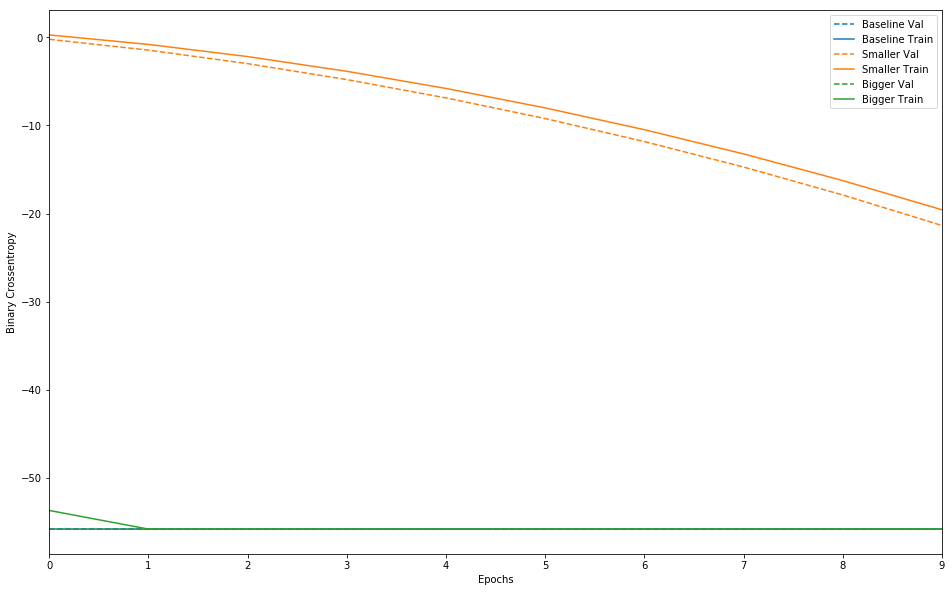

In [38]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

## Question 7.	Apply either drop out or weight regularization strategy 

### Add weight regularization

In [31]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=5,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
 - 64s - loss: -4.3063e+01 - acc: 0.1000 - binary_crossentropy: -4.3082e+01 - val_loss: -5.5762e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5777e+01
Epoch 2/5
 - 43s - loss: -5.5763e+01 - acc: 0.1000 - binary_crossentropy: -5.5777e+01 - val_loss: -5.5773e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5785e+01
Epoch 3/5
 - 53s - loss: -5.5773e+01 - acc: 0.1000 - binary_crossentropy: -5.5784e+01 - val_loss: -5.5779e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5790e+01
Epoch 4/5
 - 28s - loss: -5.5778e+01 - acc: 0.1000 - binary_crossentropy: -5.5789e+01 - val_loss: -5.5781e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5791e+01
Epoch 5/5
 - 25s - loss: -5.5781e+01 - acc: 0.1000 - binary_crossentropy: -5.5791e+01 - val_loss: -5.5783e+01 - val_acc: 0.1000 - val_binary_crossentropy: -5.5793e+01


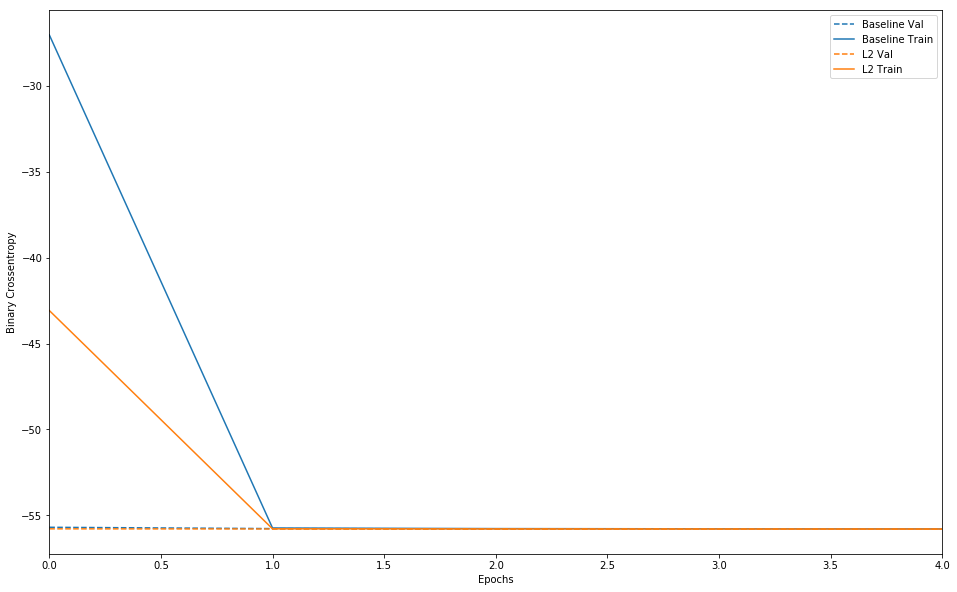

In [32]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

## 8.	Explain the impact of the strategy applied. 